### Настройка Airflow

Для начала вам необходимо выполнить ряд команд чтобы настроить окружение для дальнейшей работы, это позволит первое время не заниматься настройкой среды исполнения, а сразу начать писать код и работать с Airflow.

In [1]:
# Установка Airflow
!pip install apache-airflow==2.1.4
!pip install wtforms==2.3.3

# Инициализация базы данных
!airflow db init

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.7/155.7 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 48.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [2]:
# Создадим необходимые папки
!mkdir /root/airflow/dags
!touch /root/airflow/dags/dag.py

In [3]:
# Включим веб-сервер
!airflow webserver -p 18273 -D

/usr/local/lib/python3.8/dist-packages/flask_appbuilder/models/sqla/interface.py:68 SAWarning: relationship 'DagRun.serialized_dag' will copy column serialized_dag.dag_id to column dag_run.dag_id, which conflicts with relationship(s): 'DagRun.task_instances' (copies task_instance.dag_id to dag_run.dag_id), 'TaskInstance.dag_run' (copies task_instance.dag_id to dag_run.dag_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   To silence this warning, add the parameter 'overlaps="dag_run,task_instances"' to the 'DagRun.serialized_dag' relationship. (Background on this error at: https://sqlalche.me/e/14/qzyx)
/usr/local/lib/python3.8/dist-packages/flask_appbuilder/models/sqla/interface.py

In [4]:
# Последующие команды не имеют отношения к Airflow
# Они нужни только для корректной работы веб морды
# в среде Google Colab

!pip install pyngrok
!ngrok authtoken 2MBRgJ066swk4ThgvdLuWtytQAI_3WLNSDpTtkwHYi33C27nr # найти его можно https://dashboard.ngrok.com/get-started/setup 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=4ce9a9f43536cdb3e46d50a2e5549a7392dc5bde3d663a9d2ad6ad47c2747190
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [7]:
!ngrok authtoken 2MBRgJ066swk4ThgvdLuWtytQAI_3WLNSDpTtkwHYi33C27nr # найти его можно https://dashboard.ngrok.com/get-started/setup 

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [8]:
# Создадим пользователя Airflow
!airflow users create \
          --username admin \
          --firstname admin \
          --lastname admin \
          --role Admin \
          --email admin@example.org \
          -p 12345

/usr/local/lib/python3.8/dist-packages/flask_appbuilder/models/sqla/interface.py:68 SAWarning: relationship 'DagRun.serialized_dag' will copy column serialized_dag.dag_id to column dag_run.dag_id, which conflicts with relationship(s): 'DagRun.task_instances' (copies task_instance.dag_id to dag_run.dag_id), 'TaskInstance.dag_run' (copies task_instance.dag_id to dag_run.dag_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   To silence this warning, add the parameter 'overlaps="dag_run,task_instances"' to the 'DagRun.serialized_dag' relationship. (Background on this error at: https://sqlalche.me/e/14/qzyx)
/usr/local/lib/python3.8/dist-packages/flask_appbuilder/models/sqla/interface.py

Поместите в dag.py следующий код.

```python
from airflow import DAG
from datetime import timedelta
from airflow.utils.dates import days_ago
from airflow.operators.dummy_operator import DummyOperator

dag = DAG('dag',schedule_interval=timedelta(days=1), start_date=days_ago(1))
t1 = DummyOperator(task_id='task_1', dag=dag)
t2 = DummyOperator(task_id='task_2',dag=dag)
t3 = DummyOperator(task_id='task_3',dag=dag)
t4 = DummyOperator(task_id='task_4',dag=dag)
t5 = DummyOperator(task_id='task_5',dag=dag)
t6 = DummyOperator(task_id='task_6',dag=dag)
t7 = DummyOperator(task_id='task_7',dag=dag)
```

In [9]:
# Запуск шедулера
!airflow scheduler -D

/usr/local/lib/python3.8/dist-packages/airflow/utils/cli.py:149 SAWarning: relationship 'DagRun.serialized_dag' will copy column serialized_dag.dag_id to column dag_run.dag_id, which conflicts with relationship(s): 'DagRun.task_instances' (copies task_instance.dag_id to dag_run.dag_id), 'TaskInstance.dag_run' (copies task_instance.dag_id to dag_run.dag_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   To silence this warning, add the parameter 'overlaps="dag_run,task_instances"' to the 'DagRun.serialized_dag' relationship. (Background on this error at: https://sqlalche.me/e/14/qzyx)
/usr/local/lib/python3.8/dist-packages/airflow/utils/cli.py:149 SAWarning: relationship 'SerializedD

In [10]:
# Эта команда просто отображет веб морду на другой адрес
# Его вы можете найти https://dashboard.ngrok.com/endpoints/status
# При каждом отключении ссылка будет меняться
!nohup ngrok http -log=stdout 18273 > /dev/null &

nohup: redirecting stderr to stdout


После запуска команды выше, перейдите по адресу в ngrok и подождите  пока появится DAG с именем dag

### Задачи


**Задание #1**

Необходимо настроить зависимости между задачами так как указанно на картинке.
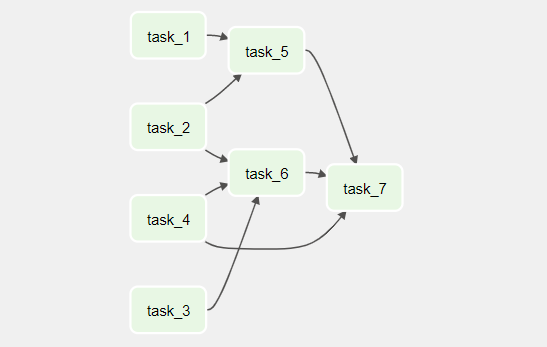

In [ ]:
from airflow import DAG
from datetime import timedelta
from airflow.utils.dates import days_ago
from airflow.operators.dummy_operator import DummyOperator

dag = DAG('dag',schedule_interval=timedelta(days=1), start_date=days_ago(1))
t1 = DummyOperator(task_id='task_1', dag=dag)
t2 = DummyOperator(task_id='task_2',dag=dag)
t3 = DummyOperator(task_id='task_3',dag=dag)
t4 = DummyOperator(task_id='task_4',dag=dag)
t5 = DummyOperator(task_id='task_5',dag=dag)
t6 = DummyOperator(task_id='task_6',dag=dag)
t7 = DummyOperator(task_id='task_7',dag=dag)

[t1, t2] >> t5
[t2, t3, t4] >> t6
[t5, t6, t4] >> t7

**Задание #2**

Необходимо настроить зависимости между задачами так как указанно на картинке.

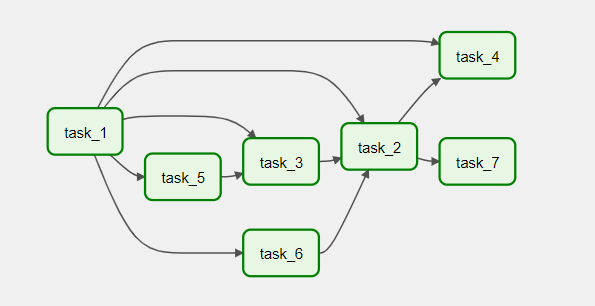

In [ ]:
from airflow import DAG
from datetime import timedelta
from airflow.utils.dates import days_ago
from airflow.operators.dummy_operator import DummyOperator

dag = DAG('dag',schedule_interval=timedelta(days=1), start_date=days_ago(1))
t1 = DummyOperator(task_id='task_1', dag=dag)
t2 = DummyOperator(task_id='task_2',dag=dag)
t3 = DummyOperator(task_id='task_3',dag=dag)
t4 = DummyOperator(task_id='task_4',dag=dag)
t5 = DummyOperator(task_id='task_5',dag=dag)
t6 = DummyOperator(task_id='task_6',dag=dag)
t7 = DummyOperator(task_id='task_7',dag=dag)

[t1] >> t5
[t1] >> t6
[t1, t5] >> t3
[t1, t3, t6] >> t2
[t1, t2] >> t4
[t2] >> t7

Даг нужно написать в файл /root/airflow/dags/dag.py. Проверку можно сделать в веб интерфейсе. Прежде чем даг появится, может пройти ~ 2-3 минут.